## Titanic Dataset – Exploratory Data Analysis (EDA)

This notebook performs exploratory data analysis (EDA) on the Titanic dataset to understand key factors influencing passenger survival. .

In [1]:
import pandas as pd

In [ ]:
# Data Loading
train_data = pd.read_csv('../Data/train.csv')

### EDA 1 - Survival by Sex

Initial Data Overview

In [6]:
train_data.shape

(891, 12)

In [8]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_data['Sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
train_data['Survived'].unique()

array([0, 1])

In [ ]:
train_data['Sex'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [15]:
train_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

In [ ]:
#checking for missing values
train_data['Sex'].isna().sum()

np.int64(0)

In [18]:
#checking for missing values
train_data['Survived'].isna().sum()

np.int64(0)

**Observation:**  
The `Sex` column contains two categories (`male`, `female`) and has no missing values. The `Survived` column contains two categories (`0`, `1`), where 0 - indicates non-survival, 1 -  indicates survival. The `Survived` column has no missing values. No inconsistencies were observed, so the feature is ready for analysis.

In [19]:
import matplotlib.pyplot as plt

In [20]:
# Calculate survival rate by sex
survival_by_sex = train_data.groupby('Sex')['Survived'].mean()

print(survival_by_sex)

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64


### Visualization

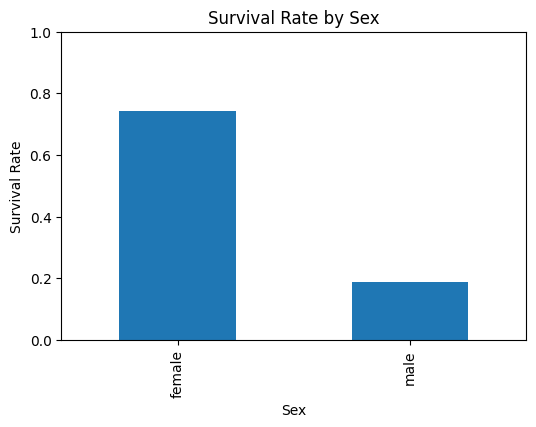

In [21]:
# Plot
plt.figure(figsize=(6, 4))
survival_by_sex.plot(kind='bar')

plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)
plt.show()

**Summary:**  
The visualization shows a substantial difference in survival rates between genders. Female passengers had a significantly higher survival rate than male passengers, which aligns with the historical “women and children first” evacuation policy. This indicates that `Sex` is a strong predictor of survival.


### EDA 2 - Survival by Passenger Class

Initial Data Overview

In [22]:
train_data['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [23]:
train_data['Pclass'].isna().sum()

np.int64(0)

In [24]:
train_data['Pclass'].unique()

array([3, 1, 2])

**Observation:**  
The `Pclass` column contains 3 categories: 1, 2 and 3 and has no missing values. No inconsistencies were observed, so the feature is ready for analysis.

In [25]:
# Calculate survival rate by class
survival_by_pclass = train_data.groupby('Pclass')['Survived'].mean()

print(survival_by_pclass)

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64


### Visualization

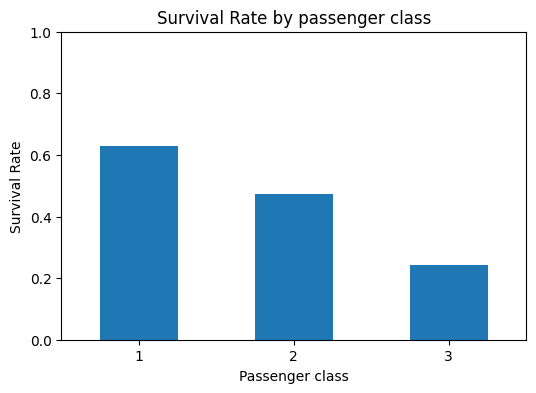

In [26]:
# Plot
plt.figure(figsize=(6, 4))
survival_by_pclass.plot(kind='bar')

plt.title('Survival Rate by passenger class')
plt.xlabel('Passenger class')
plt.ylabel('Survival Rate')

plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.show()

**Observation:**  
The visualization shows that passengers in 1st class had the highest survival rate, followed by 2nd and 3rd class. This indicates that passenger class was an important factor in survival probability.


### EDA 3 - Survival by Age

Initial Data Overview

In [27]:
train_data['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [28]:
train_data['Age'].isna().sum()

np.int64(177)

In [29]:
# Removing from the general list the lines where Age data is missing
data_age = train_data.dropna(subset = ['Age'])

In [30]:
# Checking that there is no missing data in the Age column
data_age['Age'].isna().sum()

np.int64(0)

### Visualization

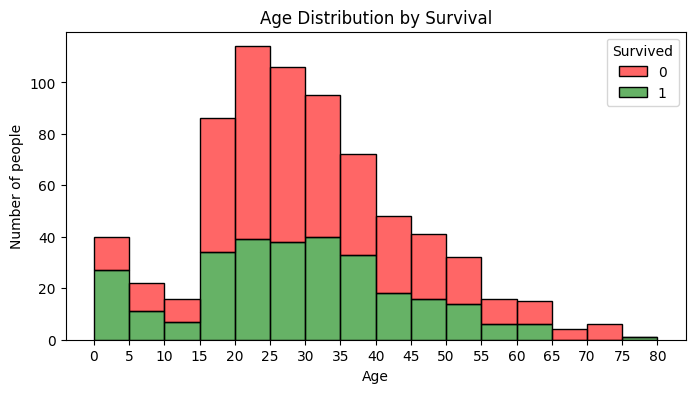

In [32]:
import seaborn as sns

plt.figure(figsize=(8,4))

# Find the maximum age
max_age = int(data_age['Age'].max())  

# Creating a histplot
sns.histplot(
    data=data_age, 
    x='Age', 
    hue='Survived', 
    bins=range(0, max_age+5, 5),   # step 5 year
    palette=['red','green'], 
    alpha=0.6,
    multiple='stack'  # display both survivors and dead in one column
)

plt.title('Age Distribution by Survival')
plt.xlabel('Age')
plt.ylabel('Number of people')

# Detailed ticks by X, from 0 to maximum age in increments of 5
plt.xticks(range(0, max_age+5, 5))

plt.show()

### Summary:
Younger passengers (0–10 years old) had a higher survival rate, while most passengers aged 15–50 did not survive. The oldest surviving passenger was 80 years old — no one older than 65 survived except them — and the youngest was only a few months old. Age appears to be an important factor in predicting survival.